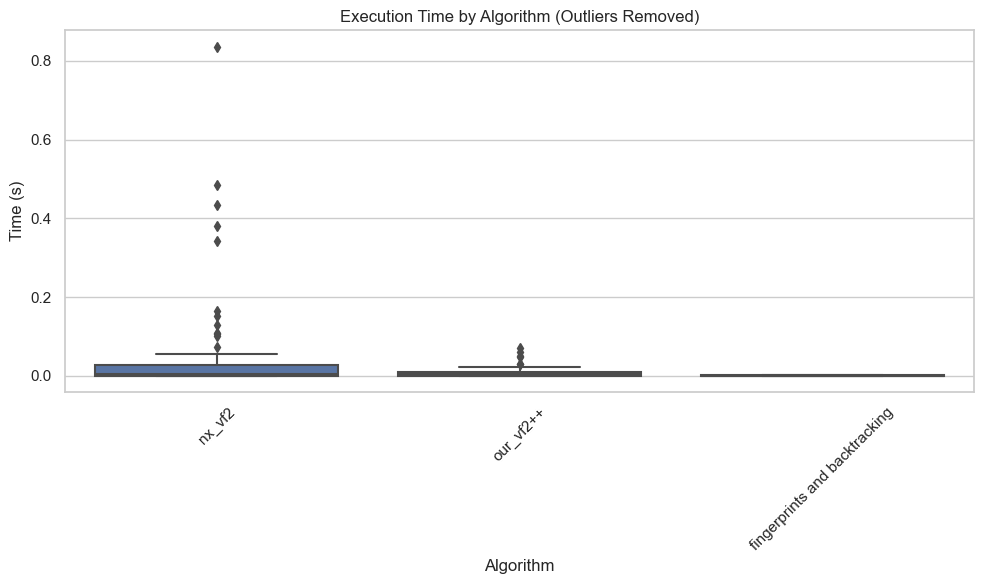

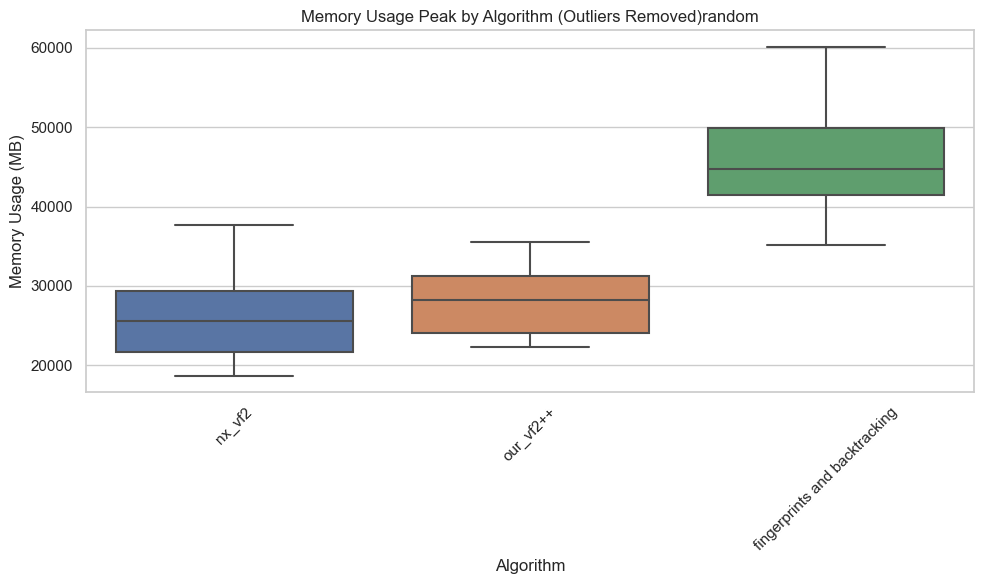

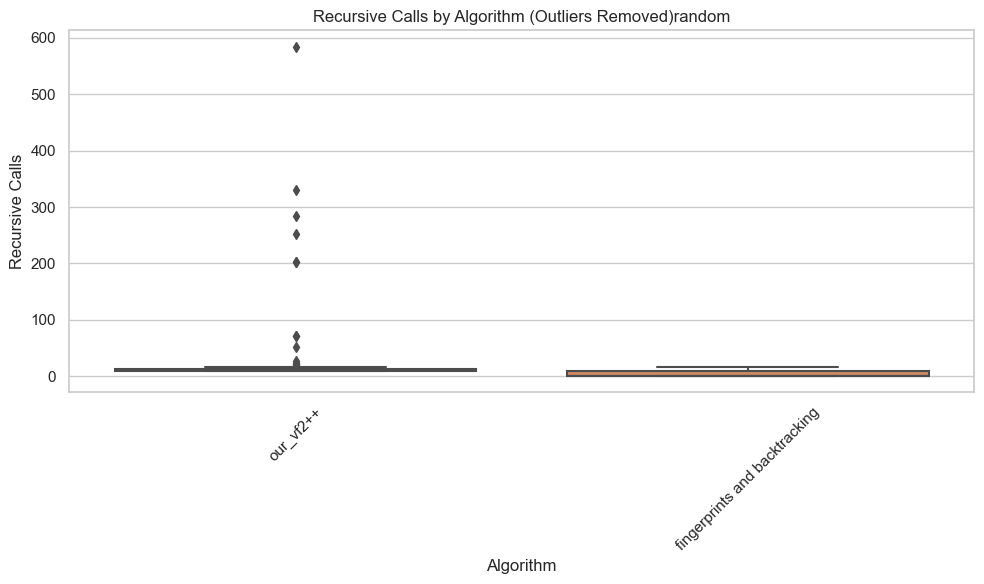

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#dataset_name='MUTAG_500'
#dataset_name='PROTEINS_500'
dataset_name='random'

# Load data
file_path = 'all_results_{}.xlsx'.format(dataset_name)  # Adjust path if needed
df = pd.read_excel(file_path)

# Set plot style
sns.set(style="whitegrid")

# Function to remove outliers using IQR method per algorithm
def remove_outliers(df, column):
    clean_df = pd.DataFrame()
    for algo in df['algorithm'].unique():
        subset = df[df['algorithm'] == algo]
        Q1 = subset[column].quantile(0.25)
        Q3 = subset[column].quantile(0.75)
        IQR = Q3 - Q1
        filtered = subset[(subset[column] >= Q1 - 1.5 * IQR) & (subset[column] <= Q3 + 1.5 * IQR)]
        clean_df = pd.concat([clean_df, filtered], axis=0)
    return clean_df

# Columns to clean
metrics = ['time', 'memory_usage_peak', 'recursive_calls']

# Remove outliers for each metric
df_cleaned = df.copy()
cleaned_dfs={}
for metric in metrics:
    cleaned_dfs[metric]=remove_outliers(df_cleaned.copy(), metric)

# Plot 1: Execution Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_dfs['time'], x='algorithm', y='time')
plt.title('Execution Time by Algorithm (Outliers Removed)'.format(dataset_name))
plt.ylabel('Time (s)')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('time_'+dataset_name+'.png')
plt.show()

# Plot 2: Memory Usage Peak
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_dfs['memory_usage_peak'], x='algorithm', y='memory_usage_peak')
plt.title('Memory Usage Peak by Algorithm (Outliers Removed){}'.format(dataset_name))
plt.ylabel('Memory Usage (MB)')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('memory_usage_peak_'+dataset_name+'.png')
plt.show()

# Plot 3: Recursive Calls
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_dfs['recursive_calls'], x='algorithm', y='recursive_calls')
plt.title('Recursive Calls by Algorithm (Outliers Removed){}'.format(dataset_name))
plt.ylabel('Recursive Calls')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('recursive_calls_'+dataset_name+'.png')
plt.show()
